In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('https://bit.ly/rikazuo_aapl', parse_dates=['Date'], index_col='Date')
#df = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date') # Read the CSV file
df = df[['Close']] # Select only the close price column


# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values)


# Split the data into train and test sets
train_size = int(len(df_scaled) * 0.7) # Use 70% of the data for training
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Create a function to generate X and y datasets for training and testing
def create_dataset(data, window_size):
  X = []
  y = []
  for i in range(window_size, len(data)):
    X.append(data[i-window_size:i]) # Use previous window_size data points as features
    y.append(data[i]) # Use current data point as target
  return np.array(X), np.array(y)

# Define the window size
window_size = 30 # Use previous 60 days of data to predict the next day

# Generate X_train and y_train datasets
X_train, y_train = create_dataset(train_data, window_size)

# Generate X_test and y_test datasets
X_test, y_test = create_dataset(test_data, window_size)

# Reshape the data to 3D for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build a sequential model with the Adam optimizer
model = Sequential()
model.add(LSTM(75, return_sequences=True, input_shape=(X_train.shape[1], 1))) # Add a LSTM layer with 50 units and return sequences
model.add(Dropout(0.2)) # Add a dropout layer to prevent overfitting
model.add(LSTM(75, return_sequences=True)) # Add another LSTM layer with 50 units and return sequences
model.add(Dropout(0.2)) # Add another dropout layer to prevent overfitting
model.add(LSTM(75)) # Add another LSTM layer with 50 units
model.add(Dropout(0.2)) # Add another dropout layer to prevent overfitting
model.add(Dense(1)) # Add a dense layer with one unit for output

optmizers: list[str] = ['sgd','Adam','RMSprop','Adagrad','Adadelta','Adamax','Nadam','Ftrl']
#optmizers: list[str] = ['Adamax']
y_pred = {}
for optmizer in optmizers:
    model.compile(loss='mae',optimizer=optmizer) # Use optimizer and mean squared error as loss function
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32) # Train for 50 epochs with batch size of 32
    # Evaluate the model on test data
    test_loss = model.evaluate(X_test, y_test)
    print('Test loss:', test_loss)
    # Make predictions on test data
    y_pred[optmizer] = model.predict(X_test)
    y_pred[optmizer] = scaler.inverse_transform(y_pred[optmizer]) # Reverse the scaling

Epoch 1/50
19/19 [==============================] - 4s 26ms/step - loss: 0.3072
Epoch 2/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1651
Epoch 3/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1483
Epoch 4/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1294
Epoch 5/50
19/19 [==============================] - 0s 25ms/step - loss: 0.1098
Epoch 6/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0838
Epoch 7/50
19/19 [==============================] - 0s 26ms/step - loss: 0.0674
Epoch 8/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0642
Epoch 9/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0643
Epoch 10/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0619
Epoch 11/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0634
Epoch 12/50
19/19 [==============================] - 0s 25ms/step - loss: 0.0612
Epoch 13/50
19/19 [==================

8/8 [==============================] - 1s 9ms/step - loss: 0.0280
Test loss: 0.02800171636044979
8/8 [==============================] - 1s 8ms/step
Epoch 1/50
19/19 [==============================] - 4s 26ms/step - loss: 0.0515
Epoch 2/50
19/19 [==============================] - 1s 26ms/step - loss: 0.0415
Epoch 3/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0451
Epoch 4/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0392
Epoch 5/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0404
Epoch 6/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0362
Epoch 7/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0426
Epoch 8/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0398
Epoch 9/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0375
Epoch 10/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0389
Epoch 11/50
19/19 [==============================] 

19/19 [==============================] - 1s 28ms/step - loss: 0.0263
Epoch 48/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0276
Epoch 49/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0269
Epoch 50/50
8/8 [==============================] - 1s 8ms/step - loss: 0.0237
Test loss: 0.02374885603785515
8/8 [==============================] - 1s 8ms/step
Epoch 1/50
19/19 [==============================] - 4s 27ms/step - loss: 0.0275
Epoch 2/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0272
Epoch 3/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0288
Epoch 4/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0282
Epoch 5/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0280
Epoch 6/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0278
Epoch 7/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0275
Epoch 8/50
19/19 [==============================]

19/19 [==============================] - 1s 28ms/step - loss: 0.0260
Epoch 45/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0266
Epoch 46/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0270
Epoch 47/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0253
Epoch 48/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0254
Epoch 49/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0271
Epoch 50/50
8/8 [==============================] - 1s 8ms/step - loss: 0.0217
Test loss: 0.02168501727283001
8/8 [==============================] - 1s 8ms/step
Epoch 1/50
19/19 [==============================] - 5s 27ms/step - loss: 0.0274
Epoch 2/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0271
Epoch 3/50
19/19 [==============================] - 1s 28ms/step - loss: 0.0306
Epoch 4/50
19/19 [==============================] - 1s 27ms/step - loss: 0.0275
Epoch 5/50
19/19 [============================

19/19 [==============================] - 1s 28ms/step - loss: 0.4521
Epoch 42/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4515
Epoch 43/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4509
Epoch 44/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4504
Epoch 45/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4498
Epoch 46/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4492
Epoch 47/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4487
Epoch 48/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4482
Epoch 49/50
19/19 [==============================] - 1s 28ms/step - loss: 0.4476
Epoch 50/50
8/8 [==============================] - 1s 8ms/step - loss: 0.6504
Test loss: 0.6504482626914978
8/8 [==============================] - 1s 8ms/step


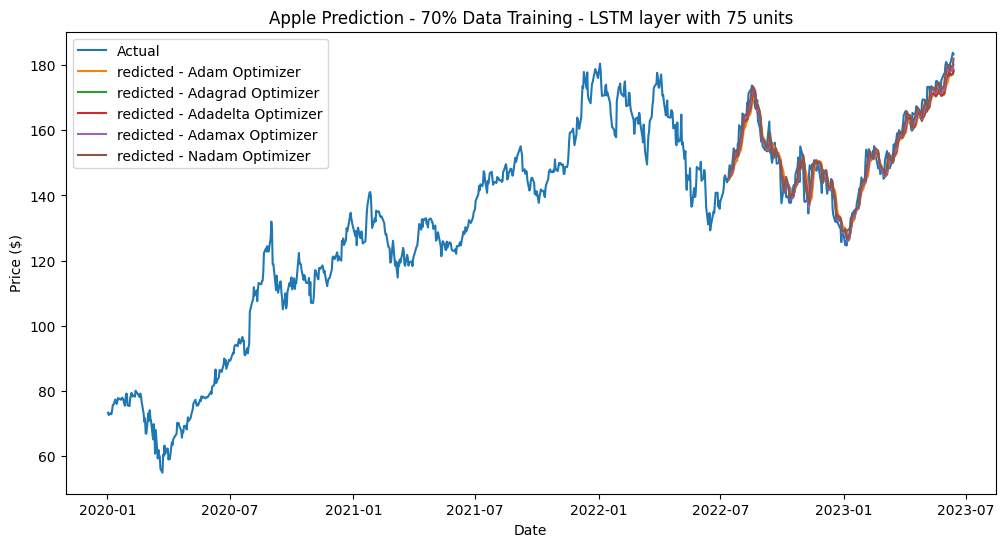

In [5]:
plt.figure(figsize=(12,6))
plt.title('Apple Prediction - 70% Data Training - LSTM layer with 75 units')
plt.plot(df['Close'], label='Actual')
for key in y_pred:
    if key in["sgd","Ftrl","RMSprop"]:
        pass
    else:
        plt.plot(df.index[window_size+train_size:], y_pred[key], label=f"redicted - {key} Optimizer")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

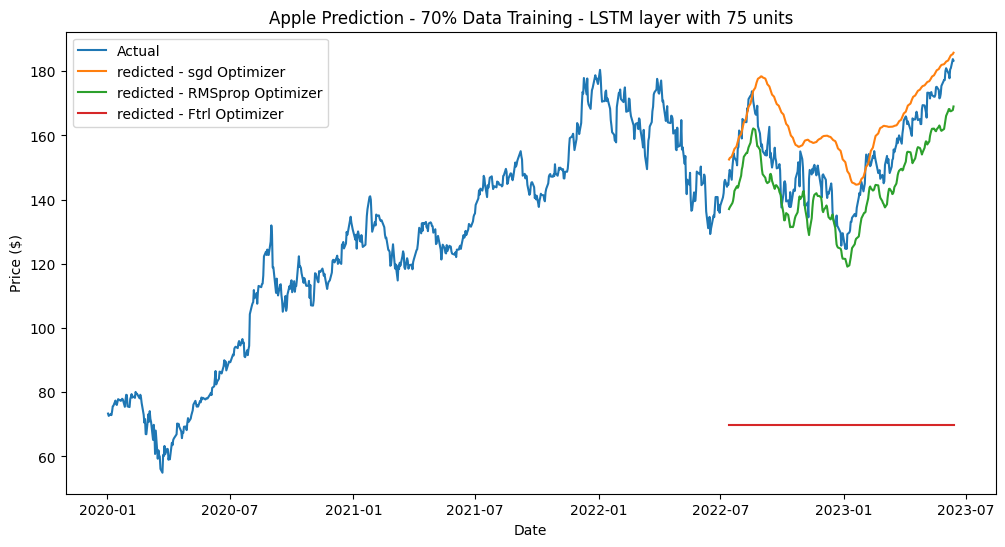

In [6]:
plt.figure(figsize=(12,6))
plt.title('Apple Prediction - 70% Data Training - LSTM layer with 75 units')
plt.plot(df['Close'], label='Actual')
for key in y_pred:
    if key in["sgd","Ftrl","RMSprop"]:
        plt.plot(df.index[window_size+train_size:], y_pred[key], label=f"redicted - {key} Optimizer")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()